In [126]:
import pandas as pd

### Load File

In [127]:
df = pd.read_excel('COVID_19.xlsx', 'Sheet1', index_col=0)
df_orig = df.copy()
# Index - col0 DateTimeIndex
df.index

DatetimeIndex([       '2020-09-20 11:23:15',        '2020-09-20 11:23:15',
                      '2020-09-20 11:23:15',        '2020-09-20 11:23:15',
                      '2020-09-20 11:23:15',        '2020-09-20 11:23:15',
                      '2020-09-20 11:23:15',        '2020-09-20 11:23:15',
                      '2020-09-20 11:23:15',        '2020-09-20 11:23:15',
               ...
               '2021-02-25 11:49:18.495000', '2021-03-02 09:51:03.899000',
               '2021-03-02 09:51:54.879000', '2021-03-02 09:53:11.825000',
               '2021-03-02 09:54:22.973000', '2021-03-02 09:56:35.956000',
               '2021-03-02 10:10:18.976000', '2021-03-04 11:03:43.786000',
               '2021-03-04 11:04:30.416000', '2021-04-05 03:18:16.644000'],
              dtype='datetime64[ns]', name='Date time', length=3308, freq=None)

### Data Preparation

In [128]:
def filter_parentheses(x):
    str_x = str(x)
    indx = str(x).find('(')
    
    return str_x.strip() if indx == -1 else str_x[:indx].strip()

In [129]:
df.info()
df = df.dropna(subset=['Gender', 'Age'])
# cast to category columns except last
for column in df.columns[:-1]:
    df[column] = df[column].apply(filter_parentheses).astype('category')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3308 entries, 2020-09-20 11:23:15 to 2021-04-05 03:18:16.644000
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    3303 non-null   object 
 1   Gender                                 3297 non-null   object 
 2   Region                                 3286 non-null   object 
 3   Do you smoke?                          3269 non-null   object 
 4   Have you had Covid`19 this year?       3305 non-null   object 
 5   IgM level                              3232 non-null   object 
 6   IgG level                              3248 non-null   object 
 7   Blood group                            3252 non-null   float64
 8   Do you vaccinated influenza?           3294 non-null   object 
 9   Do you vaccinated tuberculosis?        3303 non-null   object 
 10  Have you had influenza this y

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3296 entries, 2020-09-20 11:23:15 to 2021-04-05 03:18:16.644000
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Age                                    3296 non-null   category
 1   Gender                                 3296 non-null   category
 2   Region                                 3296 non-null   category
 3   Do you smoke?                          3296 non-null   category
 4   Have you had Covid`19 this year?       3296 non-null   category
 5   IgM level                              3296 non-null   category
 6   IgG level                              3296 non-null   category
 7   Blood group                            3296 non-null   category
 8   Do you vaccinated influenza?           3296 non-null   category
 9   Do you vaccinated tuberculosis?        3296 non-null   category
 10  Have you had infl

In [131]:
df.head()

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-09-20 11:23:15,40-65,Female,"Ukraine, Lviv",No,Maybe,<0.9,0.9-1.1,2.0,Yes,Yes,No,No,38.1
2020-09-20 11:23:15,23-40,Female,"Ukraine, Chernivtsi",No,Yes,>1.1,0.9-1.1,2.0,No,Yes,No,No,37.0
2020-09-20 11:23:15,23-40,Female,"Ukraine, Lviv",No,Maybe,<0.9,<0.9,2.0,No,Yes,Yes,No,37.8
2020-09-20 11:23:15,40-65,Male,"Ukraine, Chernivtsi",No,No,<0.9,<0.9,2.0,No,Yes,No,No,NaN
2020-09-20 11:23:15,16-22,Male,"Ukraine, Lviv",No,Yes,>1.1,<0.9,1.0,No,Yes,Yes,No,37.4


In [132]:
# describe numeric fields
df.describe()

,Maximum body temperature
count,1528.000000
mean,37.710013
std,0.634532
min,36.600000
25%,37.200000
50%,37.700000
75%,38.300000
max,38.800000


In [133]:
# describe category fields
df.describe(include=['category'])

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?
count,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296
unique,5,2,6,3,4,4,5,5,4,4,4,4
top,23-40,Female,"Ukraine, Lviv",No,No,<0.9,<0.9,2.0,No,Yes,No,No
freq,1174,1817,3070,2497,1768,2651,2587,1380,2650,2578,2347,3281


### Static Analysis

In [134]:
df['Age'].value_counts()

Age
23-40    1174
40-65    1063
16-22     823
>65       193
0-15       43
Name: count, dtype: int64

In [135]:
df['Age'].value_counts(normalize=True)

Age
23-40    0.356189
40-65    0.322512
16-22    0.249697
>65      0.058556
0-15     0.013046
Name: proportion, dtype: float64

In [136]:
# Sorting
df.sort_values(by=['Age', 'Gender'], ascending=[True, False]).head()

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-09-20 11:26:09.000,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,2.0,No,Yes,No,No,NaN
2020-09-26 11:19:25.000,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,4.0,No,No,Yes,No,NaN
2020-09-26 11:42:15.000,0-15,Male,"Ukraine, Lviv",No,Maybe,<0.9,0.9-1.1,1.0,No,Yes,Maybe,No,38.7
2020-10-09 19:35:56.393,0-15,Male,"Ukraine, Lviv",No,No,<0.9,<0.9,4.0,No,No,Yes,No,NaN
2020-11-24 10:55:41.181,0-15,Male,"Ukraine, Lviv",No,No,<0.9,0.9-1.1,1.0,No,Yes,No,No,NaN


### Data modification

In [137]:
# unique
df['Gender'].value_counts().keys()

CategoricalIndex(['Female', 'Male'], categories=['Female', 'Male'], ordered=False, dtype='category', name='Gender')

In [138]:
# Avg female temperature
df[df['Gender'] == 'Female']['Maximum body temperature'].mean()

37.70652790917691

In [139]:
# Max smoking male temperature
df[
    (df['Gender'] == 'Male')
    & (df['Do you smoke?'] == 'Yes')
    & (df['Have you had Covid`19 this year?'] == 'Yes')
]['Maximum body temperature'].max()

38.8

In [140]:
# Group
df.groupby(['Gender'])['Maximum body temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1057.0,37.706528,0.625307,36.6,37.2,37.7,38.2,38.8
Male,471.0,37.717834,0.655371,36.6,37.1,37.7,38.3,38.8


### Tables

In [141]:
# Crosstab
pd.crosstab(df['Age'], df['Gender'])

Gender,Female,Male
Age,,
0-15,15,28
16-22,266,557
23-40,645,529
40-65,795,268
>65,96,97


In [142]:
# Pivot table
pd.pivot_table(df, values= 'Maximum body temperature', index= ['Age'], columns=['Gender'], aggfunc='mean', margins=True)

Gender,Female,Male,All
Age,,,
0-15,38.500000,37.437500,37.555556
16-22,37.731579,37.790196,37.746305
23-40,37.759053,37.754680,37.757473
40-65,37.679435,37.690780,37.681947
>65,37.502041,37.642647,37.583761
All,37.706528,37.717834,37.710013


### Data Visualization

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='count'>

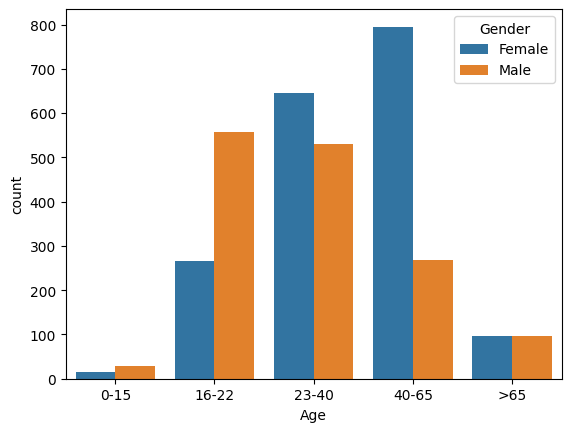

In [144]:
# Count plot
sns.countplot(x='Age', hue='Gender', data=df)

<Axes: xlabel='Date time'>

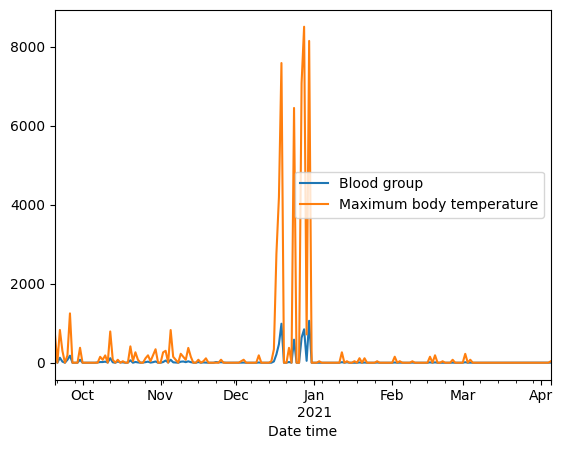

In [145]:
# category type does not support sum operations, use original dataframe
df_orig.resample('D').sum().plot()

<Axes: xlabel='Maximum body temperature', ylabel='Count'>

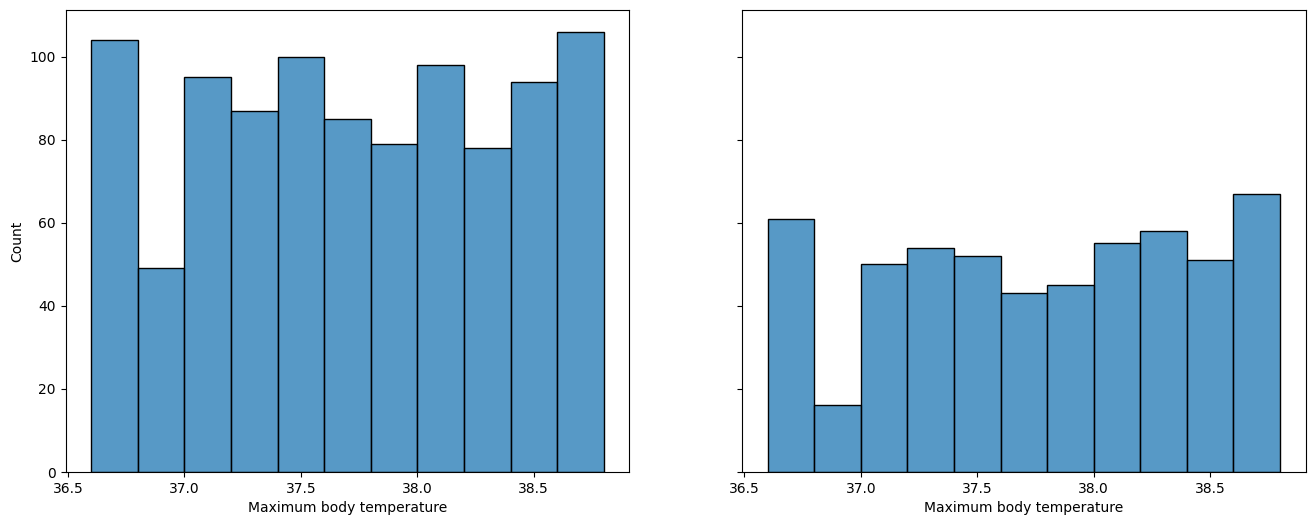

In [146]:
# Histplot
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

df_t1 = df[df['Have you had Covid`19 this year?'] == 'Yes'].dropna(subset=['Maximum body temperature'])
sns.histplot(df_t1['Maximum body temperature'], ax=axes[0])
df_t2 = df[df['Have you had Covid`19 this year?'] == 'Maybe'].dropna(subset=['Maximum body temperature'])
sns.histplot(df_t2['Maximum body temperature'], ax=axes[1])

<Axes: xlabel='Maximum body temperature', ylabel='Age'>

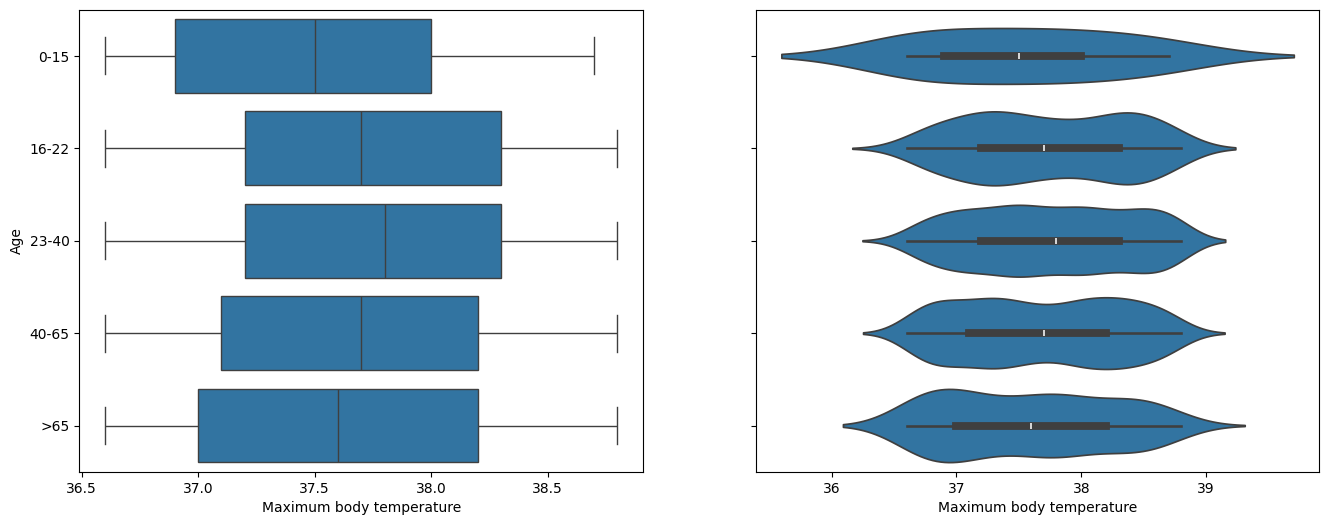

In [147]:
# boxplot and vioinplot

# drop index to avoid error 'cannot reindex on an axis with duplicate labels`
df_v = df.reset_index(drop=True)
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.boxplot(y = df_v["Age"], x=df_v["Maximum body temperature"], ax=axes[0])
sns.violinplot(y = df_v["Age"], x=df_v["Maximum body temperature"],ax=axes[1] )